In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as st
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# Import des données

In [2]:
load_memory=False
openFoodFacts_complet = pd.read_csv('../01_DATA/en.openfoodfacts.org.products.csv', sep = '\t', low_memory=False, parse_dates=[4,6])

In [3]:
openFoodFacts_complet.shape

(2002996, 187)

In [4]:
# proportion de données non renseignées sur tout le df
pourcent_NA_df(openFoodFacts_complet)

Il y a 20.24% valeurs renseignées (soit 79.76 % de valeurs manquantes) dans l'intégralité du df


# Selection des produits vendus en France

In [5]:
openFoodFacts_fr = openFoodFacts_complet[openFoodFacts_complet['countries_en'].str.contains('France') == True]

In [6]:
openFoodFacts_fr = openFoodFacts_fr.reset_index(drop=True)
openFoodFacts_fr.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16 14:53:28+00:00,1623855209,2021-06-16 14:53:29+00:00,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15 10:38:00+00:00,1561463718,2019-06-25 11:55:18+00:00,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13 21:06:14+00:00,1539464817,2018-10-13 21:06:57+00:00,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,http://world-en.openfoodfacts.org/product/0000...,del51,1444572561,2015-10-11 14:09:21+00:00,1444659212,2015-10-12 14:13:32+00:00,moutarde au moût de raisin,NaN,NaN,...,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,00000000001111111111,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1560020173,2019-06-08 18:56:13+00:00,1560020173,2019-06-08 18:56:13+00:00,Sfiudwx,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
openFoodFacts_fr.shape

(847821, 187)

In [8]:
openFoodFacts_fr.info(187)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847821 entries, 0 to 847820
Data columns (total 187 columns):
 #    Column                                                 Dtype              
---   ------                                                 -----              
 0    code                                                   object             
 1    url                                                    object             
 2    creator                                                object             
 3    created_t                                              int64              
 4    created_datetime                                       datetime64[ns, UTC]
 5    last_modified_t                                        int64              
 6    last_modified_datetime                                 datetime64[ns, UTC]
 7    product_name                                           object             
 8    abbreviated_product_name                               object           

In [9]:
openFoodFacts_fr.describe(include='all')

<ipython-input-9-b405fd32641e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  openFoodFacts_fr.describe(include='all')
<ipython-input-9-b405fd32641e>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  openFoodFacts_fr.describe(include='all')


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
count,847821,847821,847820,8.478210e+05,847821,8.478210e+05,847821,824159,7138,80241,...,11888.000000,307329.000000,3.000000,4.000000,0.0,49.000000,29.000000,17.000000,41.000000,32.000000
unique,847814,847814,7010,NaN,839244,NaN,718136,557518,7013,56737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,6703501220017,http://world-en.openfoodfacts.org/product/6703...,kiliweb,NaN,2019-03-11 15:48:20+00:00,NaN,2021-05-01 11:16:01+00:00,Filet de poulet,Boisson rafraîchissante aux extrait,Pâtes alimentaires de qualité supérieure,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,2,649844,NaN,19,NaN,160,935,5,288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,2012-01-31 14:43:58+00:00,NaN,2012-04-08 08:12:35+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-10-26 23:07:41+00:00,NaN,2021-10-26 23:52:37+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,1.543833e+09,NaN,1.589517e+09,NaN,NaN,NaN,NaN,...,614.238461,9.435201,19.000000,34.175000,NaN,0.104794,0.407549,3.421765,0.036396,0.027869
std,NaN,NaN,NaN,5.184282e+07,NaN,3.439364e+07,NaN,NaN,NaN,NaN,...,6076.719844,8.759442,5.196152,15.620153,NaN,0.139181,2.191082,1.954496,0.027440,0.099403
min,NaN,NaN,NaN,1.328021e+09,NaN,1.333873e+09,NaN,NaN,NaN,NaN,...,0.049000,-15.000000,13.000000,14.000000,NaN,0.000000,0.000000,0.400000,0.002000,0.000800
25%,NaN,NaN,NaN,1.519173e+09,NaN,1.565870e+09,NaN,NaN,NaN,NaN,...,107.800000,2.000000,17.500000,26.000000,NaN,0.060000,0.000016,1.570000,0.024000,0.007000


## Retrait des lignes en doublon

In [10]:
# recherche de doublons sur la premiere colonne
openFoodFacts_fr[openFoodFacts_fr.duplicated(subset='code', keep=False)]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
193429,30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,1608035756,2020-12-15 12:35:56+00:00,1610702480,2021-01-15 09:21:20+00:00,basilic,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193430,30383354190402,http://world-en.openfoodfacts.org/product/3038...,openfoodfacts-contributors,1608035756,2020-12-15 12:35:56+00:00,1610702583,2021-01-15 09:23:03+00:00,basilic,NaN,NaN,...,NaN,-3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229637,31843340000818,http://world-en.openfoodfacts.org/product/3184...,openfoodfacts-contributors,1629142841,2021-08-16 19:40:41+00:00,1629182103,2021-08-17 06:35:03+00:00,poudre à lever Pural,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
229638,31843340000818,http://world-en.openfoodfacts.org/product/3184...,openfoodfacts-contributors,1629142841,2021-08-16 19:40:41+00:00,1629182103,2021-08-17 06:35:03+00:00,poudre à lever Pural,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433562,3560070278831,http://world-en.openfoodfacts.org/product/3560...,openfoodfacts-contributors,1381071983,2013-10-06 15:06:23+00:00,1618645457,2021-04-17 07:44:17+00:00,"Pamplemousse rose, 100 % Pur Fruit Pressé",NaN,"Jus de pamplemousse rose - Pamplemousse Rose, ...",...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
433563,3560070278831,http://world-en.openfoodfacts.org/product/3560...,openfoodfacts-contributors,1381071983,2013-10-06 15:06:23+00:00,1621577199,2021-05-21 06:06:39+00:00,"Pamplemousse rose, 100 % Pur Fruit Pressé",NaN,"Jus de pamplemousse rose - Pamplemousse Rose, ...",...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495645,3700320230572,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1629809654,2021-08-24 12:54:14+00:00,1629809889,2021-08-24 12:58:09+00:00,glace artisanale corse coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495646,3700320230572,http://world-en.openfoodfacts.org/product/3700...,kiliweb,1629809654,2021-08-24 12:54:14+00:00,1629809938,2021-08-24 12:58:58+00:00,glace artisanale corse coco,NaN,NaN,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498233,3700439700348,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1629528332,2021-08-21 06:45:32+00:00,1629532852,2021-08-21 08:00:52+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498234,3700439700348,http://world-en.openfoodfacts.org/product/3700...,openfoodfacts-contributors,1629528332,2021-08-21 06:45:32+00:00,1629532925,2021-08-21 08:02:05+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# suppression des doublons
openFoodFacts_fr = openFoodFacts_fr.sort_values('created_datetime').drop_duplicates("code", keep = "last")

In [12]:
openFoodFacts_fr.shape

(847814, 187)

In [13]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr)

Il y a 20.30% valeurs renseignées (soit 79.70 % de valeurs manquantes) dans l'intégralité du df


## Etude des variables peu renseignées

<AxesSubplot:>

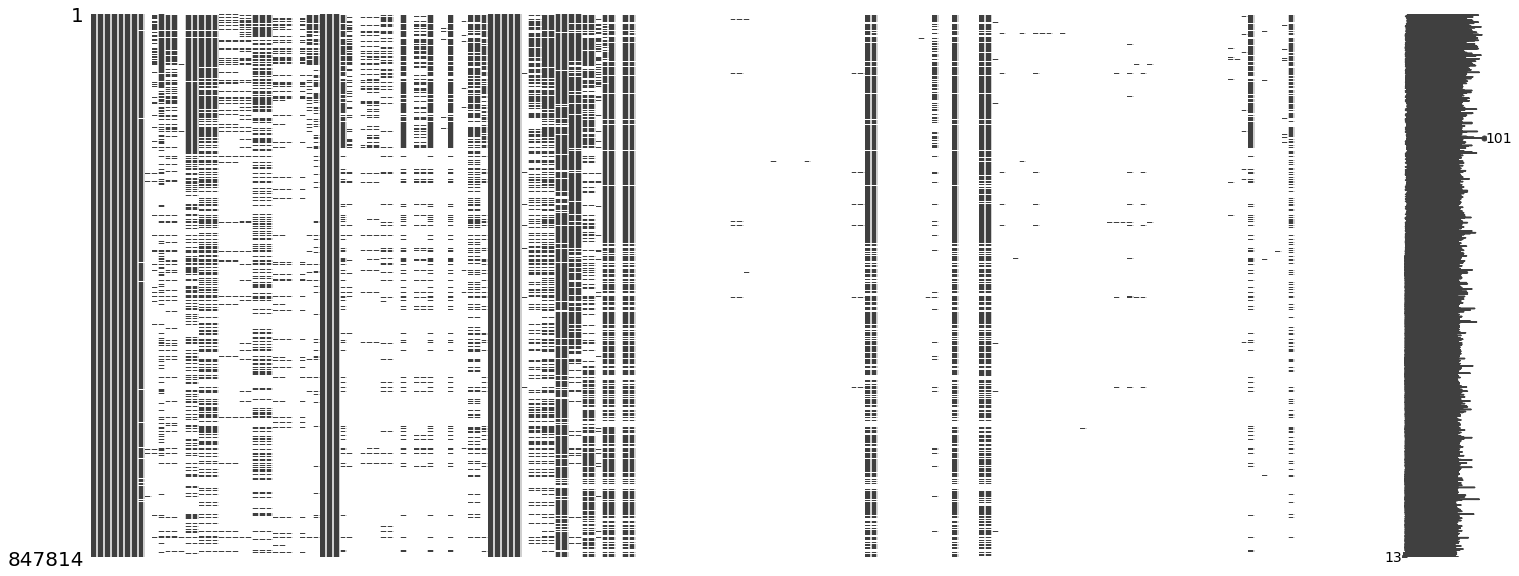

In [14]:
# visualisation des valeurs manquantes / renseignées
import missingno as msno
%matplotlib inline
msno.matrix(openFoodFacts_fr)

In [15]:
# Calcul du taux de remplissage en % pour chaque colonne 
oFF_fr_NA = 100 - 100*openFoodFacts_fr.isna().mean(axis=0)

Text(0, 0.5, 'Taux de remplissage(%)')

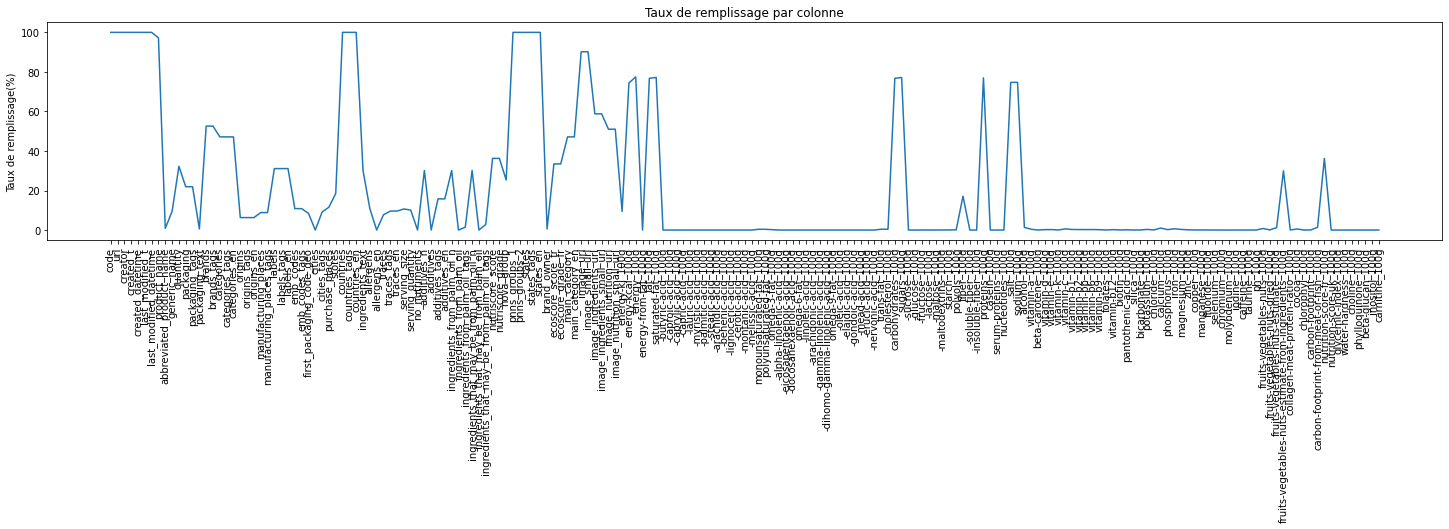

In [16]:
# visualisation du taux de remplissage
plt.figure(figsize = (25,4))
plt.xticks(rotation=90)
plt.plot(oFF_fr_NA)
plt.title('Taux de remplissage par colonne')
plt.ylabel('Taux de remplissage(%)')

In [17]:
# transformation en df
oFF_fr_NA_df = pd.DataFrame(oFF_fr_NA, columns=['taux remplissage'])
oFF_fr_NA_df = oFF_fr_NA_df.sort_values(by='taux remplissage', ascending=False)
oFF_fr_NA_df = oFF_fr_NA_df.reset_index()
oFF_fr_NA_df

,index,taux remplissage
0,code,100.0
1,countries,100.0
2,countries_en,100.0
3,states,100.0
4,states_tags,100.0
...,...,...
182,-linoleic-acid_100g,0.0
183,-docosahexaenoic-acid_100g,0.0
184,-eicosapentaenoic-acid_100g,0.0
185,-alpha-linolenic-acid_100g,0.0


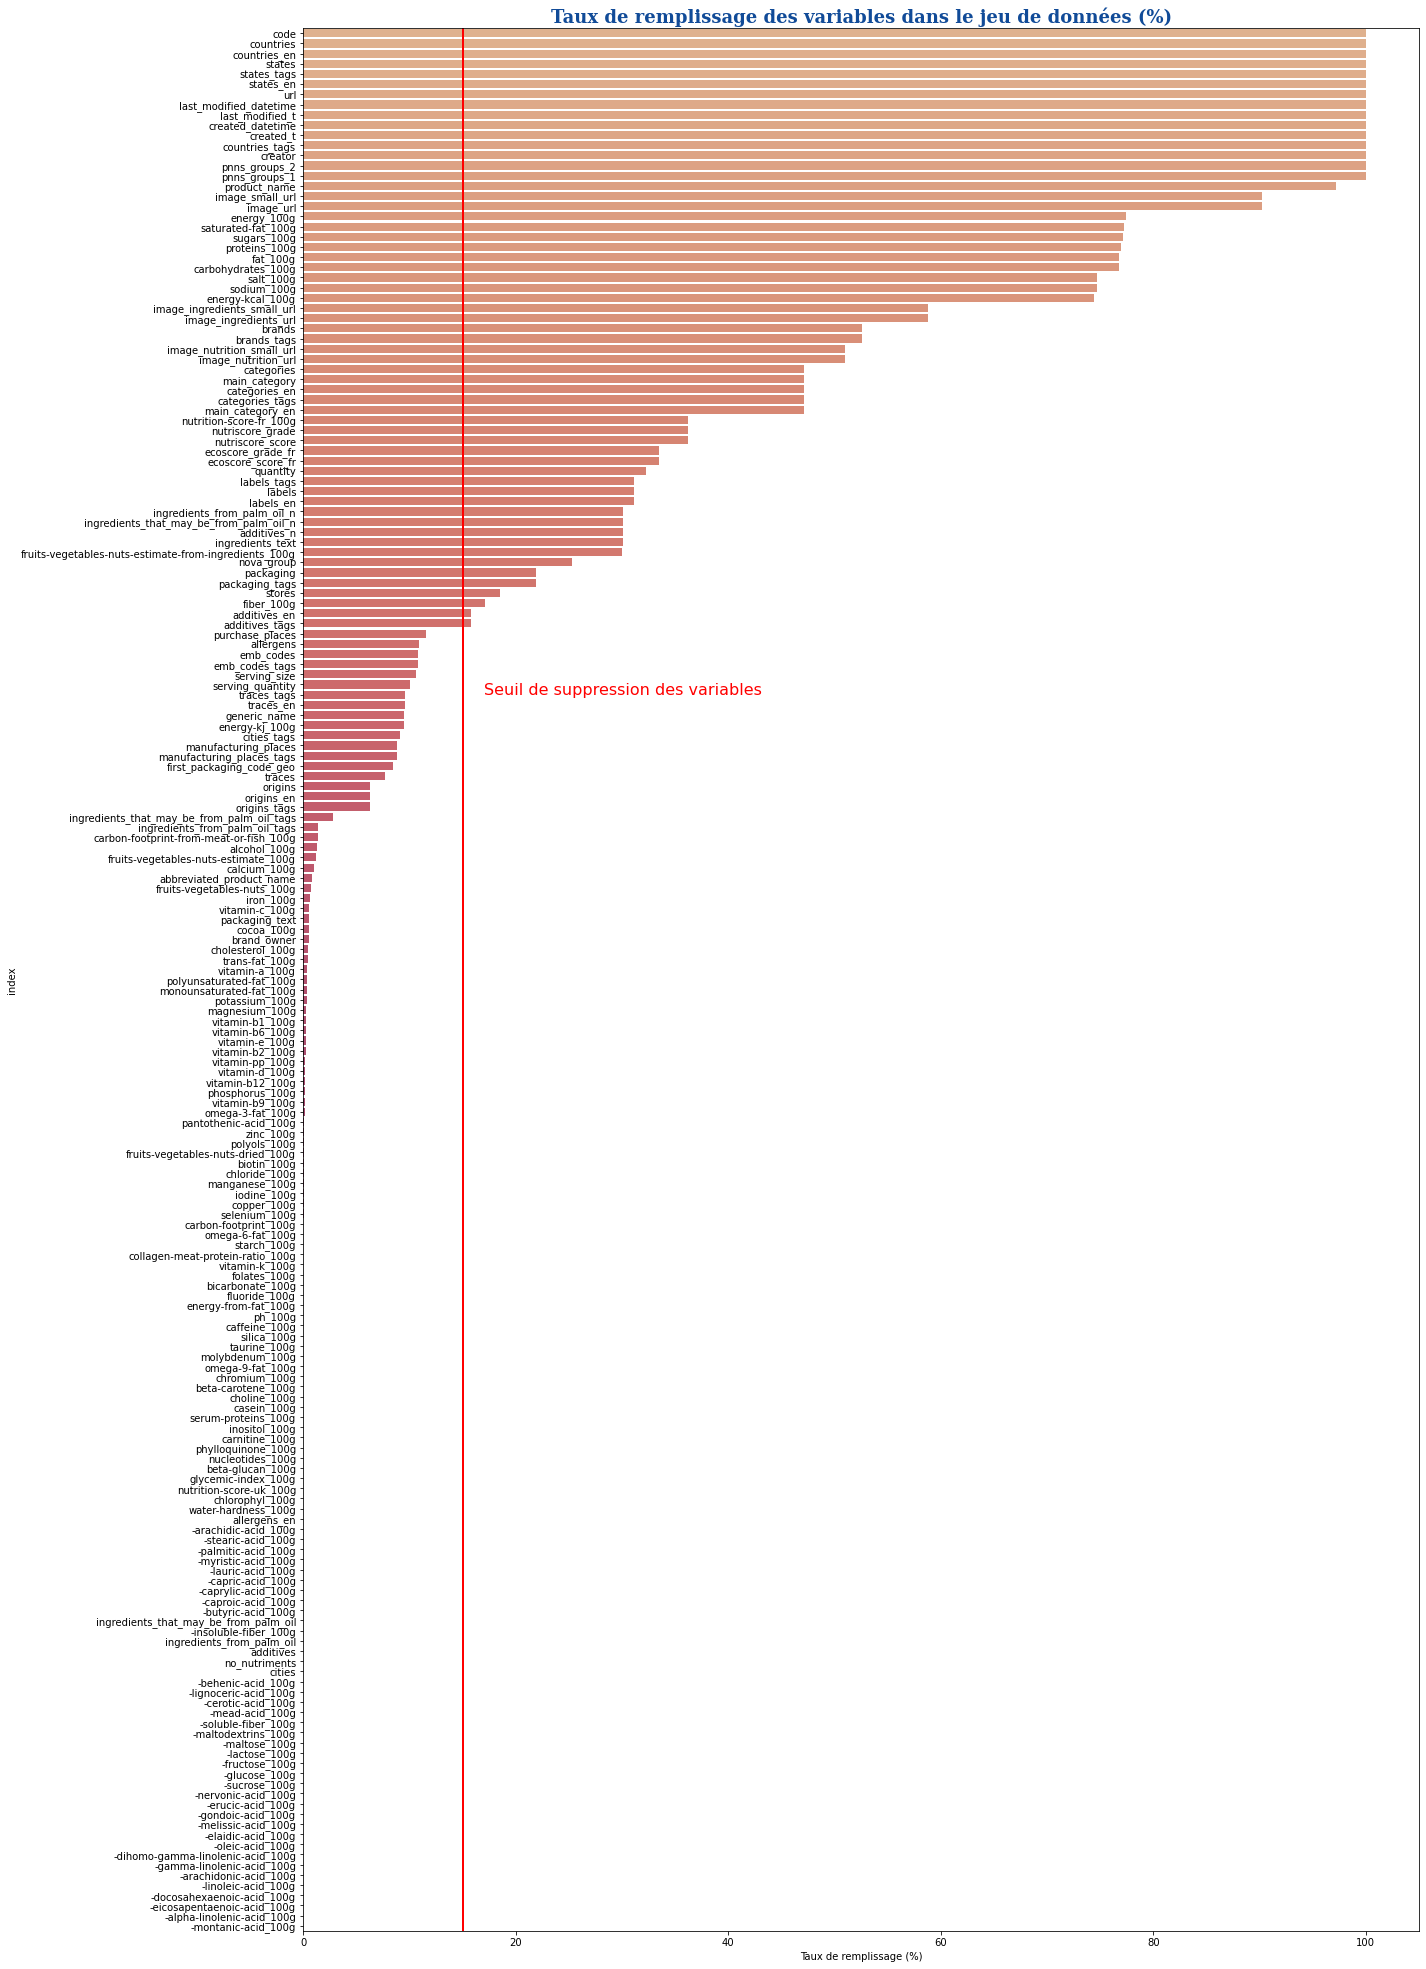

In [18]:
#  visu du taux de remplissage des variables pour aider au choix d'un seuil de selection des données
fig = plt.figure(figsize=(20, 35))
sup_threshold = 15
font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x='taux remplissage', y='index', data=oFF_fr_NA_df, palette="flare")
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 16, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

In [19]:
oFF_fr_NA_df.describe()

,taux remplissage
count,187.000000
mean,20.301194
std,32.682315
min,0.000000
25%,0.002890
50%,0.382749
75%,30.599577
max,100.000000


In [20]:
# Affichage des colonnes avec un taux de remplissage < 15%
nombre_colonne = 0
for col in range(len(oFF_fr_NA_df)):
    if oFF_fr_NA_df['taux remplissage'].iloc[col] < 15:
        print(oFF_fr_NA_df['index'].iloc[col], ', taux de remplissage (%):', oFF_fr_NA_df['taux remplissage'].iloc[col])
        nombre_colonne += 1
print('\n nombre de colonnes avec un taux de remplissage < 15% :', nombre_colonne)

purchase_places , taux de remplissage (%): 11.577067611528008
allergens , taux de remplissage (%): 10.875616585713374
emb_codes , taux de remplissage (%): 10.845185382642882
emb_codes_tags , taux de remplissage (%): 10.842590473853932
serving_size , taux de remplissage (%): 10.665311023408435
serving_quantity , taux de remplissage (%): 10.08310785148629
traces_tags , taux de remplissage (%): 9.600690717539464
traces_en , taux de remplissage (%): 9.600690717539464
generic_name , taux de remplissage (%): 9.464222105320275
energy-kj_100g , taux de remplissage (%): 9.453488618965949
cities_tags , taux de remplissage (%): 9.09397580129604
manufacturing_places , taux de remplissage (%): 8.84026449197583
manufacturing_places_tags , taux de remplissage (%): 8.83507467439793
first_packaging_code_geo , taux de remplissage (%): 8.45586414001184
traces , taux de remplissage (%): 7.679160759317497
origins , taux de remplissage (%): 6.301618043580319
origins_en , taux de remplissage (%): 6.292653813

In [21]:
# Affichage des colonnes avec un taux de remplissage >= 15%
nombre_colonne = 0
for col in range(len(oFF_fr_NA_df)):
    if oFF_fr_NA_df['taux remplissage'].iloc[col] >= 15:
        print(oFF_fr_NA_df['index'].iloc[col], ', taux de remplissage (%):', oFF_fr_NA_df['taux remplissage'].iloc[col])
        nombre_colonne += 1
print('\n nombre de colonnes avec un taux de remplissage >= 15% :', nombre_colonne)

code , taux de remplissage (%): 100.0
countries , taux de remplissage (%): 100.0
countries_en , taux de remplissage (%): 100.0
states , taux de remplissage (%): 100.0
states_tags , taux de remplissage (%): 100.0
states_en , taux de remplissage (%): 100.0
url , taux de remplissage (%): 100.0
last_modified_datetime , taux de remplissage (%): 100.0
last_modified_t , taux de remplissage (%): 100.0
created_datetime , taux de remplissage (%): 100.0
created_t , taux de remplissage (%): 100.0
countries_tags , taux de remplissage (%): 100.0
creator , taux de remplissage (%): 99.9998820496005
pnns_groups_2 , taux de remplissage (%): 99.99221527363314
pnns_groups_1 , taux de remplissage (%): 99.99197937283414
product_name , taux de remplissage (%): 97.20917559747775
image_small_url , taux de remplissage (%): 90.20870143687176
image_url , taux de remplissage (%): 90.20870143687176
energy_100g , taux de remplissage (%): 77.46227356472056
saturated-fat_100g , taux de remplissage (%): 77.210095610593

**DECISION : suppression des colonnes dont le taux de remplissage < 15%**
<=> %NaN > 85%

sauf energy-kj_100g qui peut être interessant pour la suite de l'analyse

justification : la plupart de ces colonnes sont des champs qui reposent sur la composition sur étiquette et ne peuvent donc pas être recalculés

In [22]:
# liste des colonnes à supprimer:
liste_colonnes_supp = []
for item in oFF_fr_NA[oFF_fr_NA < 15].index:
    liste_colonnes_supp.append(item)

liste_colonnes_supp.remove('energy-kj_100g')
len(liste_colonnes_supp)

127

colonnes supplémentaires à supprimer car non nécessaires pour l'analyse

In [23]:
# colonnes supplémentaires à supprimer car non nécessaires pour l'analyse
liste = ['creator', 'created_datetime', 'last_modified_datetime', 'packaging', 'packaging_tags', 
         'brands', 'brands_tags', 'countries', 'countries_tags', 'countries_en',
         'ingredients_text', 'states', 'states_tags', 'states_en', 'image_url', 'image_small_url',
         'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url',
         'packaging', 'packaging_tags', 'stores', 'additives_tags', 'additives_en', 'ecoscore_grade_fr', 
         'ecoscore_score_fr', 'created_t', 'last_modified_t']
liste_colonnes_supp.extend(liste)
len(liste_colonnes_supp)

156

In [24]:
openFoodFacts_fr_15 = openFoodFacts_fr.drop(liste_colonnes_supp, axis=1)
openFoodFacts_fr_15.shape

(847814, 33)

In [25]:
openFoodFacts_fr_15.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847814 entries, 519170 to 815862
Data columns (total 33 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   code                                                   847814 non-null  object 
 1   url                                                    847814 non-null  object 
 2   product_name                                           824153 non-null  object 
 3   quantity                                               273306 non-null  object 
 4   categories                                             399474 non-null  object 
 5   categories_tags                                        399473 non-null  object 
 6   categories_en                                          399473 non-null  object 
 7   labels                                                 263587 non-null  object 
 8   labels_tags                  

<AxesSubplot:>

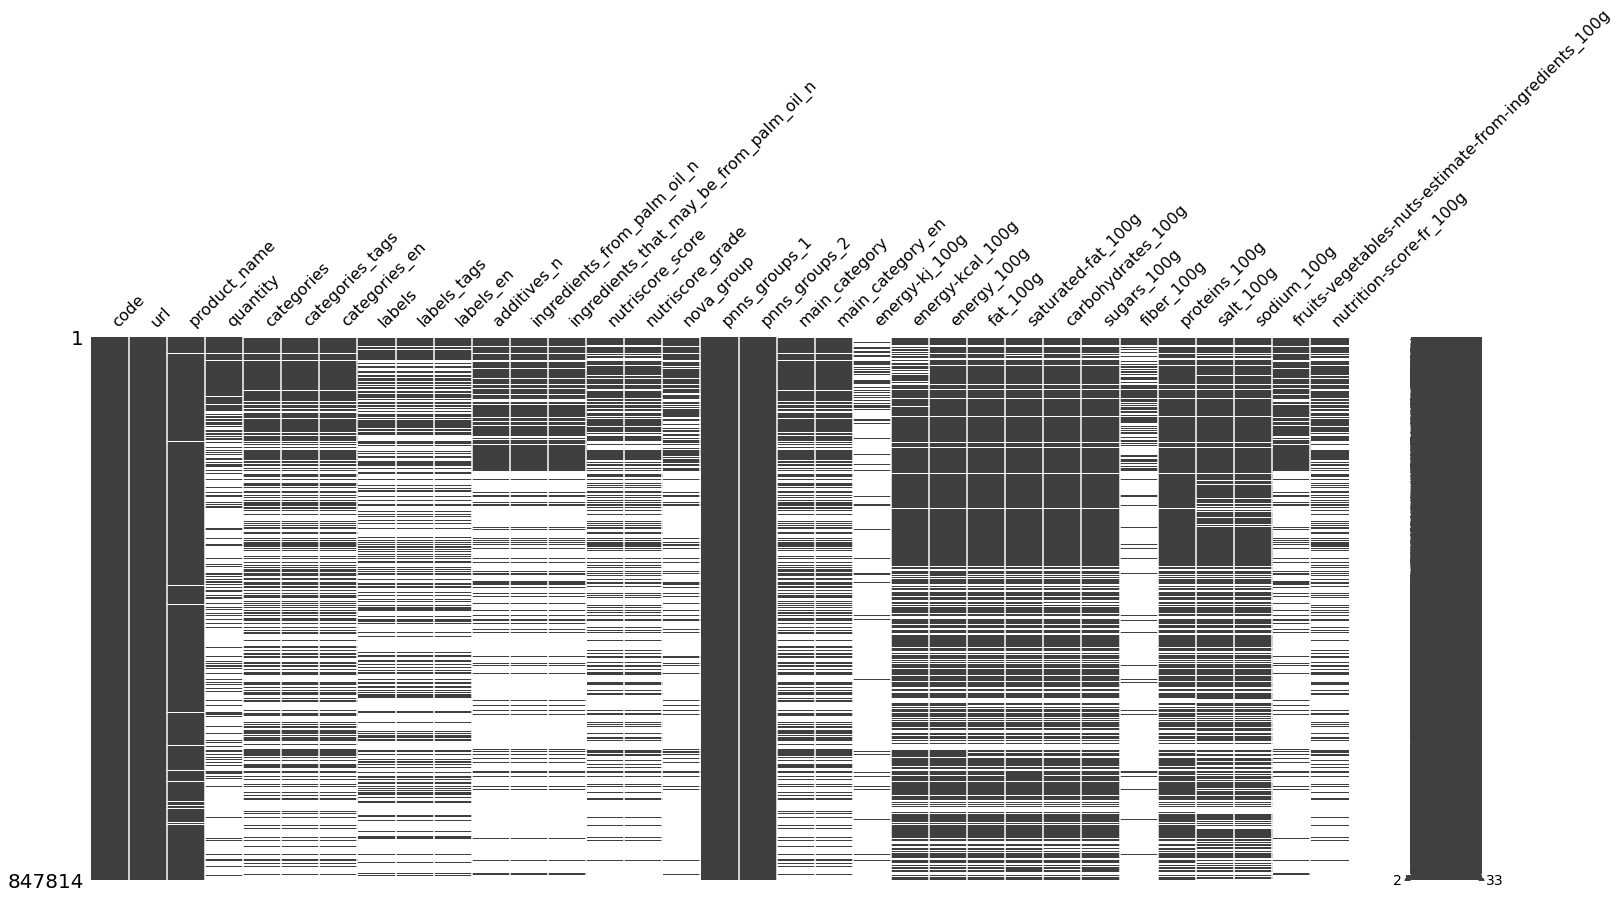

In [26]:
# visualisation des données manquantes
msno.matrix(openFoodFacts_fr_15)

In [27]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr_15)

Il y a 55.32% valeurs renseignées (soit 44.68 % de valeurs manquantes) dans l'intégralité du df


## Retrait des lignes non identifiables
product_name non renseigné

In [28]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['product_name'].isna()]),
     'lignes')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['product_name'].isna()].index)
openFoodFacts_fr_15.shape

suppression de  23661 lignes


(824153, 33)

## Retrait des lignes non alimentaire
categories_tags = non alimentaire

In [29]:
# sortie de toutes les catégories disponibles dans la variable 'categories_tags'

print('\nNombre de catégories identifié : ', len(openFoodFacts_fr_15['categories_tags'].unique()))


Nombre de catégories identifié :  45791


In [30]:
### retrait des lignes 'non alimentaire'
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['categories_tags'].str.contains('non-food-products') == True]),
     'lignes')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['categories_tags'].str.contains('non-food-products') == True].index)
openFoodFacts_fr_15.shape

suppression de  1031 lignes


(823122, 33)

## retrait des lignes mal renseignées
définition du seuil de remlpissage a partir duquel il y a potentiellement des données intéressantes

In [31]:
# ajout colonne taux de remplissage sur le df principal
openFoodFacts_fr_15['Taux de remplissage des lignes'] = 100 - 100*openFoodFacts_fr_15.isna().mean(axis=1)
openFoodFacts_fr_15

,code,url,product_name,quantity,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g,Taux de remplissage des lignes
519170,3760029248001,http://world-en.openfoodfacts.org/product/3760...,Caramels tendres au beurre salé au sel de Guér...,100 g,"Epicerie, Snacks, Snacks sucrés, Confiseries, ...","en:groceries,en:snacks,en:sweet-snacks,en:conf...","Groceries,Snacks,Sweet snacks,Confectioneries,...",en:produced-in-bretagne,en:produced-in-brittany,Produced in Brittany,...,7.0,73.5,49.3,NaN,3.0,1.7000,0.68000,0.0,28.0,93.939394
189718,3029330062806,http://world-en.openfoodfacts.org/product/3029...,Jacquet Les bouchées créatives à garnir,54 g,"Snacks, Snacks salés, Apéritif, Biscuits apéri...","en:snacks,en:salty-snacks,en:appetizers,en:cra...","Snacks,Salty snacks,Appetizers,Crackers",en:palm-oil-free,en:no-palm-oil,No palm oil,...,1.3,68.0,2.0,3.0,8.5,1.7526,0.70104,0.0,10.0,96.969697
275315,3257980112590,http://world-en.openfoodfacts.org/product/3257...,Boudoirs aux œufs frais,175 g,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Point Vert, Eco-Emballages","en:green-dot,fr:eco-emballages","Green Dot,fr:eco-emballages",...,1.2,80.4,51.8,1.6,6.9,0.0900,0.03600,0.0,14.0,100.000000
184529,3017760038409,http://world-en.openfoodfacts.org/product/3017...,Lulu la barquette fraise,120 g,"Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Sans colorants, en:made-in-france","en:made-in-france,en:sans-colorants","Made in France,Sans-colorants",...,0.6,78.0,58.0,1.7,3.8,0.0900,0.03600,27.8,13.0,100.000000
217240,3160181210524,http://world-en.openfoodfacts.org/product/3160...,Cookies tout chocolat Biocoop,200 g,"Snacks, Snacks sucrés, Biscuits et gâteaux, Bi...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Biscuit...","Bio, Bio européen, Commerce équitable, Fabriqu...","en:organic,en:eu-organic,en:fair-trade,en:made...","Organic,EU Organic,Fair trade,Made in France,A...",...,14.0,56.0,33.0,5.5,7.0,0.3810,0.15240,0.0,19.0,96.969697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99408,2006050046492,http://world-en.openfoodfacts.org/product/2006...,Velouté de poireaux et pommes de terre,2 x 30 cl,Veloutés de poireaux,"en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Nutriscore,Nutriscore C","en:nutriscore,en:nutriscore-grade-c","Nutriscore,Nutriscore Grade C",...,0.7,5.8,0.9,0.8,1.0,0.7000,0.28000,NaN,3.0,84.848485
711368,6958770003025,http://world-en.openfoodfacts.org/product/6958...,Sesame paste mianpi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.1,65.7,4.9,NaN,7.7,6.5000,2.60000,NaN,NaN,42.424242
571783,3760294960912,http://world-en.openfoodfacts.org/product/3760...,Boisson Soja Nature,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.4,1.4,0.7,0.6,3.8,NaN,NaN,NaN,NaN,39.393939
75514,0787359103551,http://world-en.openfoodfacts.org/product/0787...,Ciabatta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,NaN,100.0,0.2000,0.08000,NaN,NaN,42.424242


In [32]:
# selection des lignes peu remplies
pmax = 16
selection = openFoodFacts_fr_15[openFoodFacts_fr_15['Taux de remplissage des lignes'] <= pmax]

print(selection.shape)

# Calcul du taux de remplissage en % pour chaque colonne pour identifier à partir de quel seuil 
# il y a des données de nutrition renseignées
selection_colNA = 100 - 100*selection.isna().mean(axis=0)
selection_colNA

(68589, 34)


code                                                     100.0
url                                                      100.0
product_name                                             100.0
quantity                                                   0.0
categories                                                 0.0
categories_tags                                            0.0
categories_en                                              0.0
labels                                                     0.0
labels_tags                                                0.0
labels_en                                                  0.0
additives_n                                                0.0
ingredients_from_palm_oil_n                                0.0
ingredients_that_may_be_from_palm_oil_n                    0.0
nutriscore_score                                           0.0
nutriscore_grade                                           0.0
nova_group                                             

In [33]:
# le seuil est à 16% de taux de remplissage des lignes
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['Taux de remplissage des lignes'] <= 16]),
     'lignes')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['Taux de remplissage des lignes'] <= 16].index)
openFoodFacts_fr_15.shape

suppression de  68589 lignes


(754533, 34)

In [34]:
# suppression de la variable temporaire 'Taux de remplissage des lignes'
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop('Taux de remplissage des lignes', axis=1)

In [35]:
openFoodFacts_fr_15.shape

(754533, 33)

In [36]:
openFoodFacts_fr_15.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy-kj_100g,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
count,253171.000000,253171.000000,253171.000000,306227.000000,213317.000000,7.928500e+04,6.283110e+05,6.540200e+05,648185.000000,651934.000000,648149.000000,651522.000000,144194.000000,650005.000000,630763.000000,630762.000000,251920.000000,306230.000000
mean,1.593741,0.047774,0.116814,9.432277,3.389106,1.204087e+03,2.799348e+02,1.168526e+03,14.202758,5.388911,27.358880,13.679053,3.029894,8.975162,1.274973,0.510087,12.161071,9.432371
std,2.361538,0.216432,0.404312,8.758996,0.985817,2.871746e+04,1.768210e+03,1.003247e+04,40.071261,8.425919,240.081251,39.232737,5.104036,91.084888,18.469162,7.387849,55.341037,8.759015
min,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,0.000000,2.000000,3.000000,4.290000e+02,1.110000e+02,4.600000e+02,1.000000,0.200000,2.500000,0.600000,0.200000,1.500000,0.060000,0.024000,0.000000,2.000000
50%,1.000000,0.000000,0.000000,10.000000,4.000000,9.860000e+02,2.640000e+02,1.095000e+03,8.000000,2.000000,14.000000,3.400000,1.700000,6.200000,0.520000,0.208000,0.000000,10.000000
75%,2.000000,0.000000,0.000000,16.000000,4.000000,1.621000e+03,4.010000e+02,1.674000e+03,22.000000,8.000000,52.000000,19.200000,3.700000,12.941176,1.300000,0.520000,7.882353,16.000000
max,30.000000,3.000000,6.000000,40.000000,4.000000,8.010000e+06,1.360000e+06,8.010000e+06,29000.000000,2000.000000,192000.000000,27000.000000,200.000000,73000.000000,14000.000000,5600.000000,13454.000000,40.000000


## retrait des lignes avec des valeurs de nutrition incohérentes
### Lignes _100g avec des valeurs <0 ou >100

In [37]:
openFoodFacts_fr_15.columns[openFoodFacts_fr_15.columns.str.contains('_100')]

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [38]:
liste_100g = ['fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 
              'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
              'fruits-vegetables-nuts-estimate-from-ingredients_100g'
              ]
for colonne in liste_100g:
    print('suppression de', 
          len(openFoodFacts_fr_15[(openFoodFacts_fr_15[colonne] < 0) | (openFoodFacts_fr_15[colonne] > 100)]),
          'lignes correspondants à des valeurs <0 ou >100 pour la colonne ', colonne)
    openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[(openFoodFacts_fr_15[colonne] < 0) | (openFoodFacts_fr_15[colonne] > 100)].index)

openFoodFacts_fr_15.shape

suppression de 10 lignes correspondants à des valeurs <0 ou >100 pour la colonne  fat_100g
suppression de 7 lignes correspondants à des valeurs <0 ou >100 pour la colonne  saturated-fat_100g
suppression de 20 lignes correspondants à des valeurs <0 ou >100 pour la colonne  carbohydrates_100g
suppression de 2 lignes correspondants à des valeurs <0 ou >100 pour la colonne  sugars_100g
suppression de 1 lignes correspondants à des valeurs <0 ou >100 pour la colonne  fiber_100g
suppression de 2 lignes correspondants à des valeurs <0 ou >100 pour la colonne  proteins_100g
suppression de 18 lignes correspondants à des valeurs <0 ou >100 pour la colonne  salt_100g
suppression de 0 lignes correspondants à des valeurs <0 ou >100 pour la colonne  sodium_100g
suppression de 838 lignes correspondants à des valeurs <0 ou >100 pour la colonne  fruits-vegetables-nuts-estimate-from-ingredients_100g


(753635, 33)

### Lignes similaires avec des informations incohérentes

#### fat vs saturated fat

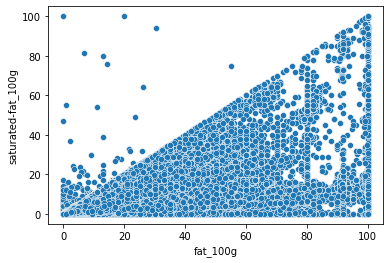

In [39]:
sns.scatterplot(x='fat_100g', y='saturated-fat_100g', data=openFoodFacts_fr_15);

par définition, saturated_fat < fat

==> suppression des lignes où saturated_fat > fat

In [40]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['saturated-fat_100g'] > openFoodFacts_fr_15['fat_100g']]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['saturated-fat_100g'] > openFoodFacts_fr_15['fat_100g']].index)
openFoodFacts_fr_15.shape

suppression de  303 valeurs


(753332, 33)

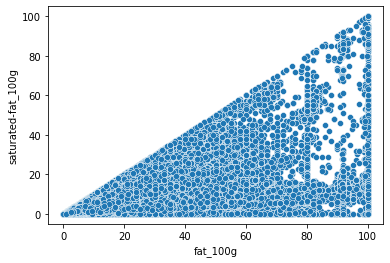

In [41]:
sns.scatterplot(x='fat_100g', y='saturated-fat_100g', data=openFoodFacts_fr_15);

#### carbohydrates vs sugars

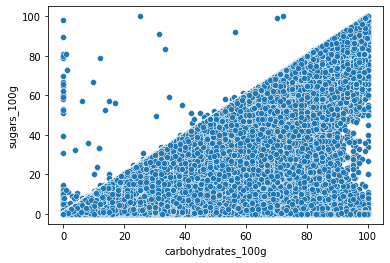

In [42]:
sns.scatterplot(x='carbohydrates_100g', y='sugars_100g', data=openFoodFacts_fr_15);

par définition, sugars < carbohydrates

==> suppression des lignes où carbohydrates < sugars

In [43]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['sugars_100g'] > openFoodFacts_fr_15['carbohydrates_100g']]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['sugars_100g'] > openFoodFacts_fr_15['carbohydrates_100g']].index)
openFoodFacts_fr_15.shape

suppression de  267 valeurs


(753065, 33)

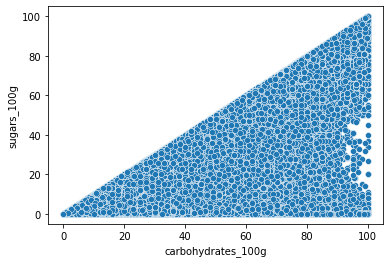

In [44]:
sns.scatterplot(x='carbohydrates_100g', y='sugars_100g', data=openFoodFacts_fr_15);

#### salt vs sodium

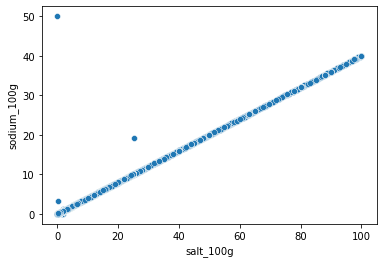

In [45]:
sns.scatterplot(x='salt_100g', y='sodium_100g', data=openFoodFacts_fr_15);

par définition sodium = 40% salt (NaCl)

In [46]:
openFoodFacts_fr_15[openFoodFacts_fr_15['sodium_100g'] > openFoodFacts_fr_15['salt_100g']]

,code,url,product_name,quantity,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
226739,3179732324818,http://world-en.openfoodfacts.org/product/3179...,Eau gazeuse Perrier fines bulles 1L,1 L,"Boissons, Boissons gazeuses, Eaux, Eaux de sou...","en:beverages,en:carbonated-drinks,en:waters,en...","Beverages,Carbonated drinks,Waters,Spring wate...",NaN,NaN,NaN,...,NaN,0.0,NaN,0.0,0.0,0.0,0.002413,0.3800,0.00,4.0
256101,3250391458851,http://world-en.openfoodfacts.org/product/3250...,Pocket 5 Fruits,360 g (4 * 90 g e),"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Peu ou pas de sucre, Peu de sucre, Allégé en s...","en:low-or-no-sugar,en:low-sugar,en:reduced-sug...","Low or no sugar,Low sugar,Reduced sugar,30% le...",...,0.3,0.1,14.3,13.1,1.4,0.2,0.000010,0.0040,95.00,-4.0
737669,7896496971831,http://world-en.openfoodfacts.org/product/7896...,Trato Mix Completo,200g,"Alimentos e bebidas à base de plantas, Aliment...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,...,6.2,2.1,22.0,12.0,11.0,15.0,0.000000,0.0480,0.00,-2.0
762050,8015602000435,http://world-en.openfoodfacts.org/product/8015...,Penne séché à basse température,500g,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Bio, Bio européen, IT-BIO-008, Séchées lenteme...","en:organic,en:eu-organic,en:it-bio-008,fr:sech...","Organic,EU Organic,IT-BIO-008,fr:sechees-lente...",...,1.2,0.3,75.0,3.3,2.6,10.5,0.000005,0.0020,0.00,-3.0
224249,3175681797437,http://world-en.openfoodfacts.org/product/3175...,Biscuits moelleux saveur muesli fleur d'oranger,"200 g (9 biscuits de 22,2 g)","Snacks, Desserts, Snacks sucrés, Biscuits et g...","en:snacks,en:desserts,en:sweet-snacks,en:biscu...","Snacks,Desserts,Sweet snacks,Biscuits and cake...","Fabriqué en France, Avec édulcorants","en:made-in-france,en:with-sweeteners","Made in France,With sweeteners",...,8.2,3.8,57.0,21.0,3.7,19.0,0.000590,0.2360,8.00,10.0
249158,3245412478864,http://world-en.openfoodfacts.org/product/3245...,"Milk-Shake substitut de repas, saveur chocolat...",750 ml (3 x 250 ml),"Boissons, Produits laitiers, Desserts, Plats p...","en:beverages,en:dairies,en:desserts,en:meals,e...","Beverages,Dairies,Desserts,Meals,Dairy drinks,...","Peu ou pas de sucre, Peu de sucre, Allégé en s...","en:low-or-no-sugar,en:low-sugar,en:reduced-sugar","Low or no sugar,Low sugar,Reduced sugar",...,2.2,0.6,7.1,4.9,1.5,8.2,0.000180,0.0720,0.00,NaN
161135,26037318,http://world-en.openfoodfacts.org/product/2603...,Gateau Marbré au chocolat,300 g (10 portions),"Snacks, Snacks sucrés, Biscuits et gâteaux, Gâ...","en:snacks,en:sweet-snacks,en:biscuits-and-cake...","Snacks,Sweet snacks,Biscuits and cakes,Cakes,C...",NaN,NaN,NaN,...,22.0,2.0,53.0,27.0,NaN,5.4,0.000180,0.0720,5.20,11.0
188864,3023291267034,http://world-en.openfoodfacts.org/product/3023...,"Le Yaourt, Saveur Vanille (8 Pots)",1 kg (8 x 125 g),"Produits laitiers, Desserts, Produits fermenté...","en:dairies,en:desserts,en:fermented-foods,en:f...","Dairies,Desserts,Fermented foods,Fermented mil...","Point Vert, Fabriqué en France, Au Lait Entier...","en:green-dot,en:made-in-france,fr:au-lait-enti...","Green Dot,Made in France,fr:au-lait-entier,fr:...",...,3.0,2.0,13.3,13.3,0.0,3.1,0.124968,49.9872,0.00,14.0
487866,3700029201880,http://world-en.openfoodfacts.org/product/3700...,Falafels,700 g,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...","Kascher, Point Vert, Sans conservateurs","en:kosher,en:green-

concerne 12 produits qui n'ont pas de raison d'avoir plus de sodium que de sel

==> suppression des valeurs anormales

In [47]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['sodium_100g'] > openFoodFacts_fr_15['salt_100g']]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['sodium_100g'] > openFoodFacts_fr_15['salt_100g']].index)
openFoodFacts_fr_15.shape

suppression de  12 valeurs


(753053, 33)

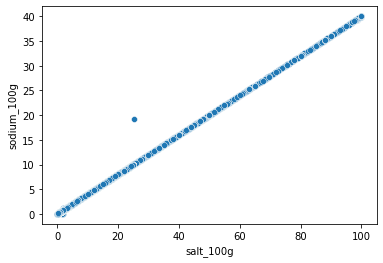

In [48]:
sns.scatterplot(x='salt_100g', y='sodium_100g', data=openFoodFacts_fr_15);

In [49]:
openFoodFacts_fr_15[openFoodFacts_fr_15['sodium_100g'] > openFoodFacts_fr_15['salt_100g']]

,code,url,product_name,quantity,categories,categories_tags,categories_en,labels,labels_tags,labels_en,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g


### lignes où somme des macronutriment > 100g 
fat_100g + carbohydrates_100g + proteins_100g + salt_100g + fiber_100g

In [50]:
openFoodFacts_fr_15['total_100g'] = (openFoodFacts_fr_15['fat_100g'] 
                                     + openFoodFacts_fr_15['carbohydrates_100g']
                                     + openFoodFacts_fr_15['proteins_100g']
                                     + openFoodFacts_fr_15['sodium_100g']
                                     + openFoodFacts_fr_15['fiber_100g'])


In [51]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['total_100g'] > 100]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['total_100g'] > 100].index)

suppression de  2709 valeurs


In [52]:
# suppression de la variable temporaire total_100g
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop('total_100g', axis=1)

In [53]:
openFoodFacts_fr_15.shape

(750344, 33)

### Suppression des lignes non ou mal renseignées dans les variables cibles pour l'application et où il ne sera pas possible de faire une imputation pertinente
ie : variables nutriscore_score, ingredients_from_palm_oil_n et ingredients_that_may_be_from_palm_oil_n, additives_n

In [54]:
openFoodFacts_fr_15[['nutriscore_score', 
                     'ingredients_from_palm_oil_n', 
                     'ingredients_that_may_be_from_palm_oil_n',
                     'additives_n'
                     ]].describe()

,nutriscore_score,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,additives_n
count,303188.000000,249464.000000,249464.000000,249464.000000
mean,9.439282,0.047690,0.117356,1.593521
std,8.749146,0.216303,0.405406,2.359834
min,-15.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000,1.000000
75%,16.000000,0.000000,0.000000,2.000000
max,40.000000,3.000000,6.000000,30.000000


In [55]:
# suppression des lignes vides sur le nutriscore_score
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['nutriscore_score'].isna()]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['nutriscore_score'].isna()].index)
openFoodFacts_fr_15.shape

suppression de  447156 valeurs


(303188, 33)

In [56]:
# suppression des lignes vides sur le ingredients_from_palm_oil_n
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['ingredients_from_palm_oil_n'].isna()]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['ingredients_from_palm_oil_n'].isna()].index)
openFoodFacts_fr_15.shape

suppression de  130675 valeurs


(172513, 33)

In [57]:
# suppression des lignes vides sur le ingredients_that_may_be_from_palm_oil_n
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['ingredients_that_may_be_from_palm_oil_n'].isna()]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['ingredients_that_may_be_from_palm_oil_n'].isna()].index)
openFoodFacts_fr_15.shape

suppression de  0 valeurs


(172513, 33)

In [58]:
# suppression des lignes vides sur le additives_n
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['additives_n'].isna()]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['additives_n'].isna()].index)
openFoodFacts_fr_15.shape

suppression de  0 valeurs


(172513, 33)

In [59]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr_15)

Il y a 91.63% valeurs renseignées (soit 8.37 % de valeurs manquantes) dans l'intégralité du df


## Vérification de la cohérence entre nutriscore_score et nutriscore_grade
variables optenues par calcul implémenté par open Food Facts sur leur application

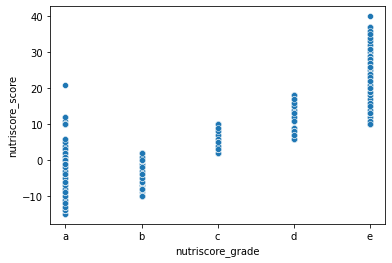

In [60]:
# visualisation de la répartition des grade de nutriscore en fonction du score nutriscore
selection = openFoodFacts_fr_15[['nutriscore_score', 'nutriscore_grade']]
selection = selection.sort_values(by='nutriscore_grade')
sns.scatterplot(y='nutriscore_score', x='nutriscore_grade', data=selection);

Les valeurs attendues du score par classe sont :
- A : solide -15 à -1 / liquides =classe Waters
- B : solide 0-2 / liquides -15 à -1
- C : solide 3-10 / liquides 2-5
- D : solide 11-18 / liquides 6-9
- E : solide 19-40 / liquides 10-40


In [61]:
# verification si des produits sont identifiés comme 'b' avec un score > 2
selection[(selection['nutriscore_grade']=='b') & (selection['nutriscore_score']>2)]

,nutriscore_score,nutriscore_grade


In [62]:
# verification si des produits sont identifiés comme 'c' avec un score > 10 ou <2
selection[(selection['nutriscore_grade']=='c')
          & (selection['nutriscore_score']>10)
          & (selection['nutriscore_score']<2)]

,nutriscore_score,nutriscore_grade


In [63]:
# verification si des produits sont identifiés comme 'd' avec un score > 18 ou <6
selection[(selection['nutriscore_grade']=='d')
          & (selection['nutriscore_score']>18)
          & (selection['nutriscore_score']<6)]

,nutriscore_score,nutriscore_grade


In [64]:
# verification si des produits sont identifiés comme 'e' avec un score < 10
selection[(selection['nutriscore_grade']=='e')
          & (selection['nutriscore_score']<10)]

,nutriscore_score,nutriscore_grade


comme le nutriscore est calculé en automatique par le site openFoodFacts on peut supposer que les calculs au sein de chaque catégorie a été réalisé correctement

## analyse des colonnes avec des noms similaires
**variables quantitatives :**

- nutrition-score-fr_100g et nutriscore_score
- salt_100g et sodium_100g
- energy_100g, energy-kcal_100g et energy-kj_100g

**variables qualitatives**
- categories / 'categories_tags' / 'categories_en' / 'main_category' / 'main_category_en' / 'pnns_groups_1' / 'pnns_groups_2',

- 'labels', 'labels_tags', 'labels_en',
- additives_n vs additives_tags vs additives_en

### Deux variables quantitatives : coef de correlation pearson
#### 1. nutrition score

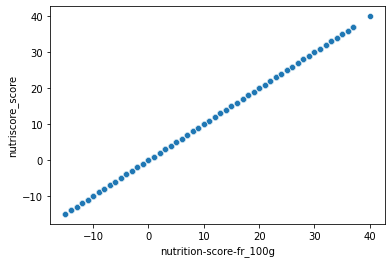

In [65]:
sns.scatterplot(x='nutrition-score-fr_100g', y='nutriscore_score', data=openFoodFacts_fr_15);

In [66]:
# calcul du coeff de pearson
selection = openFoodFacts_fr_15[['nutrition-score-fr_100g', 'nutriscore_score']]
print('les variables {} et {} sont corrélée à {:0.2f}%'.format(selection.columns[0],
                                                               selection.columns[1],
                                                               100*selection.corr(method='pearson').iloc[0,1]
                                                              ))

les variables nutrition-score-fr_100g et nutriscore_score sont corrélée à 100.00%


In [67]:
openFoodFacts_fr_15[['nutrition-score-fr_100g', 'nutriscore_score']].describe()

,nutrition-score-fr_100g,nutriscore_score
count,172513.000000,172513.000000
mean,8.926162,8.926162
std,8.959780,8.959780
min,-15.000000,-15.000000
25%,1.000000,1.000000
50%,9.000000,9.000000
75%,16.000000,16.000000
max,40.000000,40.000000


==> suppression de la variable nutrition-score-fr_100g

In [68]:
# ajout à la liste des colonnes à supprimer
liste = ['nutrition-score-fr_100g']
liste_colonnes_supp.extend(liste)

openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(liste, axis=1)
openFoodFacts_fr_15.shape

(172513, 32)

#### 2. Salt vs Sodium

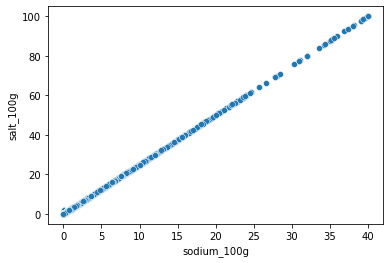

In [69]:
sns.scatterplot(x='sodium_100g', y='salt_100g', data=openFoodFacts_fr_15);

In [70]:
# calcul du coeff de pearson
selection = openFoodFacts_fr_15[['sodium_100g', 'salt_100g']]
print('les variables {} et {} sont corrélée à {:0.2f}%'.format(selection.columns[0],
                                                               selection.columns[1],
                                                               100*selection.corr(method='pearson').iloc[0,1]
                                                              ))

les variables sodium_100g et salt_100g sont corrélée à 100.00%


In [71]:
openFoodFacts_fr_15[['sodium_100g', 'salt_100g']].describe()

,sodium_100g,salt_100g
count,172293.000000,172293.000000
mean,0.381619,0.954066
std,0.966424,2.416102
min,0.000000,0.000000
25%,0.025500,0.063600
50%,0.200000,0.500000
75%,0.480000,1.200000
max,40.000000,100.000000


==> suppression de la variable salt qui est redondante avec la variable sodium + c'est le sodium qui est utilisé dans le nutriscore

In [72]:
# ajout à la liste des colonnes à supprimer
liste = ['salt_100g']
liste_colonnes_supp.extend(liste)
len(liste_colonnes_supp)

158

In [73]:
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(liste, axis=1)
openFoodFacts_fr_15.shape

(172513, 31)

#### 3. energy

<AxesSubplot:xlabel='energy_100g', ylabel='energy-kcal_100g'>

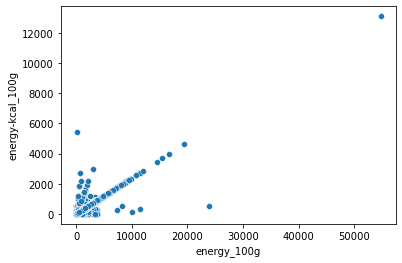

In [74]:
sns.scatterplot(data=openFoodFacts_fr_15, x='energy_100g', y='energy-kcal_100g')

In [75]:
# calcul du coeff de pearson
selection = openFoodFacts_fr_15[['energy_100g', 'energy-kcal_100g']]
print('les variables {} et {} sont corrélée à {:0.2f}%'.format(selection.columns[0],
                                                               selection.columns[1],
                                                               100*selection.corr(method='pearson').iloc[0,1]
                                                              ))

les variables energy_100g et energy-kcal_100g sont corrélée à 98.49%


==> Il semble qu'il y ait des valeurs exprimées en kj dans energy_100g ou dans energy-kcal_100g

<AxesSubplot:xlabel='energy_100g', ylabel='energy-kj_100g'>

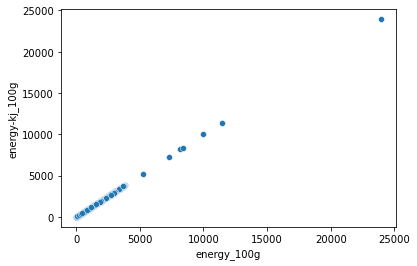

In [76]:
sns.scatterplot(data=openFoodFacts_fr_15, x='energy_100g', y='energy-kj_100g')

In [77]:
# calcul du coeff de pearson
selection = openFoodFacts_fr_15[['energy_100g', 'energy-kj_100g']]
print('les variables {} et {} sont corrélée à {:0.2f}%'.format(selection.columns[0],
                                                               selection.columns[1],
                                                               100*selection.corr(method='pearson').iloc[0,1]
                                                              ))

les variables energy_100g et energy-kj_100g sont corrélée à 100.00%


==> vu la correlation parfaite entre energy_100g et energy-kj_100g, a priori energy_100g est censé être exprimé en kj

<AxesSubplot:xlabel='energy-kcal_100g', ylabel='energy-kj_100g'>

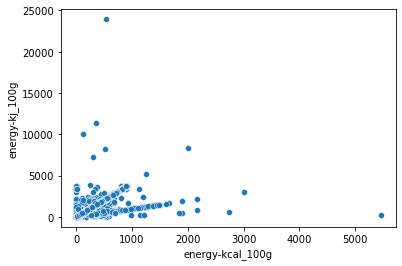

In [78]:
sns.scatterplot(data=openFoodFacts_fr_15, x='energy-kcal_100g', y='energy-kj_100g')

In [79]:
# calcul du coeff de pearson
selection = openFoodFacts_fr_15[['energy-kcal_100g', 'energy-kj_100g']]
print('les variables {} et {} sont corrélée à {:0.2f}%'.format(selection.columns[0],
                                                               selection.columns[1],
                                                               100*selection.corr(method='pearson').iloc[0,1]
                                                              ))

les variables energy-kcal_100g et energy-kj_100g sont corrélée à 94.07%


Hypothèse : 
- energy est un mix de données exprimées en kj et en kcal

Pour vérifier cela, je crée un jeu de données intermédiaire, duquel je retire les lignes où energy=energy-kj et je vérifie si energy et energy-kcal sont bien corrélés

Après retrait des données exprimées en kj, les variables energy-kcal_100g et energy_100g sont corrélées à 99.99%.


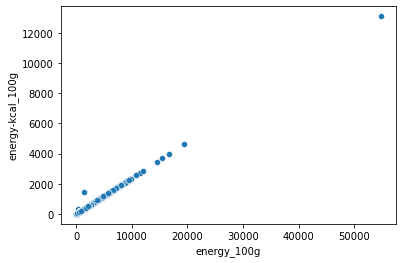

In [80]:
data = openFoodFacts_fr_15[['energy-kcal_100g', 'energy-kj_100g', 'energy_100g']]
data = data.drop(data[data['energy_100g'] == data['energy-kj_100g']].index)

selection = data[['energy-kcal_100g', 'energy_100g']]
print('Après retrait des données exprimées en kj, les variables energy-kcal_100g et energy_100g sont corrélées à {:0.2f}%.'.format(100*selection.corr(method='pearson').iloc[0,1]))
sns.scatterplot(data=data, x='energy_100g', y='energy-kcal_100g');

In [81]:
openFoodFacts_fr_15['temp'] = openFoodFacts_fr_15['energy_100g']/openFoodFacts_fr_15['energy-kcal_100g']
openFoodFacts_fr_15['temp'].describe()

count    1.507420e+05
mean              inf
std               NaN
min      0.000000e+00
25%      4.182573e+00
50%      4.184061e+00
75%      4.185714e+00
max               inf
Name: temp, dtype: float64

energy_100g et energy_kcal sont très bien corrélées mais pas sur la droite x=y. Visiblement toutes les données de energy_100g sont exprimées en kJ

==> je garde uniquement la colonne energy_100g

In [82]:
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop('temp', axis=1)

In [83]:
# ajout à la liste des colonnes à supprimer
liste = ['energy-kcal_100g', 'energy-kj_100g']
liste_colonnes_supp.extend(liste)

openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(liste, axis=1)
openFoodFacts_fr_15.shape

(172513, 29)

## Analyse de la colonne energy_100g

<AxesSubplot:xlabel='energy_100g'>

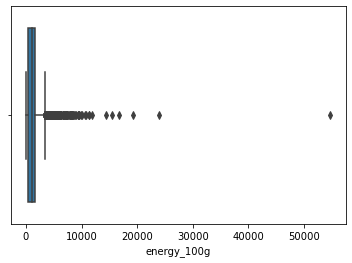

In [84]:
sns.boxplot(x=openFoodFacts_fr_15['energy_100g'])

In [85]:
# suppression des lignes où energy_calc_kcal > 900*4.184 =  3765.6 kj (valeur max possible dans l'alimentaire)
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['energy_100g']>3765.6]),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['energy_100g']>3765.6].index)
openFoodFacts_fr_15.shape

suppression de  855 valeurs


(171658, 29)

In [86]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr_15)

Il y a 93.10% valeurs renseignées (soit 6.90 % de valeurs manquantes) dans l'intégralité du df


In [87]:
# renommage colonne energy_100g en energy_kJ
openFoodFacts_fr_15 = openFoodFacts_fr_15.rename({'energy_100g' : 'energy_kJ'}, axis=1)

### Deux variables qualitatives : test du khi2

Utilisation du test du Khi2 pour déterminer si les variables sont indépendantes ou non

H0: les deux variables sont indépendantes

H1: les variables comparées sont dépendantes

In [88]:
# fonction pour faire le test du khi2
def test_khi2(dataframe, X, Y, alpha):
    # si beaucoup de données, echantillonnage aléatoire pour permettre le calcul de la matrice de contingence
    if len(dataframe) > 100000:
        data = dataframe[[X,Y]].sample(n=int(len(dataframe)/2))
    else:
        data = dataframe[[X,Y]]
    
    # tableau de contingence
    cont = data.pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
    cont = cont.fillna(0)
    cont = cont.astype(int)
    
    st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont)
    
    print('les variables {} et {} présentent une valeur de chi2 de {:0.2f} '.format(X, Y, st_chi2),
          'pour un degrés de liberté de {} et une p-value de {}.'.format(st_dof, st_p))

    
    if st_p < alpha/100:
        print("L'hypothèse H0 est rejetée, les variables {} et {} ne sont pas indépendantes".format(X, Y))
    else:
        print("L'hypothèse H0 est retenue, les variables {} et {} sont considérées comme indépendantes".format(X, Y))
    

### 1. categories vs categories_tags

In [89]:
X = "categories"
Y = "categories_tags"

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables categories et categories_tags présentent une valeur de chi2 de 1721653685.19  pour un degrés de liberté de 505213440 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables categories et categories_tags ne sont pas indépendantes


### 2. 'categories_tags' vs 'categories_en

In [90]:
X = "categories_tags"
Y = "categories_en"

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables categories_tags et categories_en présentent une valeur de chi2 de 1733488313.00  pour un degrés de liberté de 407959204 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables categories_tags et categories_en ne sont pas indépendantes


### 3. main_category' / 'main_category_en

In [91]:
X = "main_category"
Y = "main_category_en"

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables main_category et main_category_en présentent une valeur de chi2 de 750917921.00  pour un degrés de liberté de 76562500 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables main_category et main_category_en ne sont pas indépendantes


### 4. 'categories_tags' vs 'main_category

In [92]:
X = "categories_tags"
Y = "main_category"

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables categories_tags et main_category présentent une valeur de chi2 de 750737516.00  pour un degrés de liberté de 176823324 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables categories_tags et main_category ne sont pas indépendantes


### 5. 'labels' vs 'labels_tags'

In [93]:
X = 'labels'
Y = 'labels_tags'

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables labels et labels_tags présentent une valeur de chi2 de 816414881.78  pour un degrés de liberté de 306595520 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables labels et labels_tags ne sont pas indépendantes


### 6. 'labels_tags' vs 'labels_en',

In [94]:
X = 'labels_tags'
Y = 'labels_en'

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables labels_tags et labels_en présentent une valeur de chi2 de 809426586.00  pour un degrés de liberté de 256064004 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables labels_tags et labels_en ne sont pas indépendantes


### 7. 'pnns_groups_1', 'pnns_groups_2'

In [95]:
X = 'pnns_groups_1'
Y = 'pnns_groups_2'

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables pnns_groups_1 et pnns_groups_2 présentent une valeur de chi2 de 858290.00  pour un degrés de liberté de 440 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables pnns_groups_1 et pnns_groups_2 ne sont pas indépendantes


### 8. categories_tags vs pnns_groups_2

In [96]:
X = 'categories_tags'
Y = 'pnns_groups_2'

test_khi2(dataframe=openFoodFacts_fr_15, X=X, Y=Y, alpha=0.1)

les variables categories_tags et pnns_groups_2 présentent une valeur de chi2 de 3182166.89  pour un degrés de liberté de 802280 et une p-value de 0.0.
L'hypothèse H0 est rejetée, les variables categories_tags et pnns_groups_2 ne sont pas indépendantes


In [97]:
openFoodFacts_fr_15['pnns_groups_1'].unique()

array(['Sugary snacks', 'Salty snacks', 'Beverages',
       'Fruits and vegetables', 'Fish Meat Eggs',
       'Milk and dairy products', 'Cereals and potatoes',
       'Fat and sauces', 'Composite foods', 'unknown',
       'Alcoholic beverages'], dtype=object)

In [98]:
openFoodFacts_fr_15['pnns_groups_2'].unique()

array(['Sweets', 'Appetizers', 'Biscuits and cakes',
       'Waters and flavored waters', 'Chocolate products', 'Vegetables',
       'Fish and seafood', 'Salty and fatty products', 'Cheese',
       'Fruit juices', 'Cereals', 'Sweetened beverages', 'Dried fruits',
       'Fats', 'One-dish meals', 'Bread', 'Dressings and sauces',
       'Legumes', 'Milk and yogurt', 'unknown', 'Ice cream', 'Fruits',
       'Soups', 'Plant-based milk substitutes', 'Processed meat',
       'Breakfast cereals', 'Pizza pies and quiches', 'Potatoes',
       'Artificially sweetened beverages', 'Unsweetened beverages',
       'Pastries', 'Meat', 'Dairy desserts', 'Eggs', 'Sandwiches',
       'Fruit nectars', 'Nuts', 'Offals',
       'Teas and herbal teas and coffees', 'Alcoholic beverages'],
      dtype=object)

In [99]:
selection = openFoodFacts_fr_15[['categories', 'categories_tags', 'categories_en',
                                 'main_category', 'main_category_en', 'labels', 
                                 'labels_en', 'labels_tags', 'pnns_groups_1', 
                                 'pnns_groups_2']]
selection.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171658 entries, 519170 to 170418
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   categories        171657 non-null  object
 1   categories_tags   171657 non-null  object
 2   categories_en     171657 non-null  object
 3   main_category     171657 non-null  object
 4   main_category_en  171657 non-null  object
 5   labels            101337 non-null  object
 6   labels_en         101338 non-null  object
 7   labels_tags       101338 non-null  object
 8   pnns_groups_1     171658 non-null  object
 9   pnns_groups_2     171658 non-null  object
dtypes: object(10)
memory usage: 14.4+ MB


In [100]:
selection.describe()

,categories,categories_tags,categories_en,main_category,main_category_en,labels,labels_en,labels_tags,pnns_groups_1,pnns_groups_2
count,171657,171657,171657,171657,171657,101337,101338,101338,171658,171658
unique,41231,32303,32303,12587,12587,33438,28181,28181,11,40
top,Boissons,en:beverages,Beverages,en:sweetened-beverages,Sweetened beverages,Point Vert,Green Dot,en:green-dot,Sugary snacks,Biscuits and cakes
freq,2189,2355,2355,3721,3721,4951,5441,5441,35387,15867


In [101]:
# environ 7% des données sont unknown dans la colonne pnns_groups_2
selection['pnns_groups_2'].value_counts()

Biscuits and cakes                  15867
One-dish meals                      13694
Sweets                              12332
unknown                             12087
Processed meat                       8732
Cheese                               8191
Cereals                              7932
Dressings and sauces                 7317
Milk and yogurt                      6701
Fish and seafood                     5813
Sweetened beverages                  5770
Vegetables                           5662
Chocolate products                   5384
Salty and fatty products             5037
Meat                                 4252
Bread                                4201
Appetizers                           4151
Unsweetened beverages                3613
Breakfast cereals                    3207
Dairy desserts                       3133
Fruits                               3025
Fruit juices                         2924
Fats                                 2713
Ice cream                         

In [102]:
# environ 7% des données sont unknown dans la colonne pnns_groups_1
selection['pnns_groups_1'].value_counts()

Sugary snacks              35387
Milk and dairy products    20536
Fish Meat Eggs             19870
Cereals and potatoes       17969
Composite foods            17135
Beverages                  16365
unknown                    12087
Fruits and vegetables      11564
Salty snacks               10692
Fat and sauces             10030
Alcoholic beverages           23
Name: pnns_groups_1, dtype: int64

In [103]:
# la variable main_category semble mieux renseignées (pas de unknown)
selection['main_category'].value_counts().head(10)

en:sweetened-beverages      3721
en:beverages                2356
en:biscuits                 1608
en:unsweetened-beverages    1524
en:dark-chocolates          1303
en:candies                  1187
en:white-hams               1106
en:microwave-meals           869
en:crackers                  803
en:chocolate-biscuits        740
Name: main_category, dtype: int64

=> pour les catégories je choisi de garder la variable pnns_group2 même si elle comporte des données unknown car je n'ai pas besoin d'avoir une catégorisation trop précise.

=> pour les labels, je garde uniquement labels_tags car on s'affranchi des problemes de casse

In [104]:
# ajout à la liste des colonnes à supprimer
liste = ['categories', 'categories_tags', 'categories_en', 'main_category_en', 'main_category',
         'labels', 'labels_en', 'pnns_groups_1']

liste_colonnes_supp.extend(liste)

openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(liste, axis=1)
openFoodFacts_fr_15.shape

(171658, 21)

In [105]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr_15)

Il y a 94.37% valeurs renseignées (soit 5.63 % de valeurs manquantes) dans l'intégralité du df


In [106]:
openFoodFacts_fr_15 = openFoodFacts_fr_15.reset_index(drop=True)

## KNN pour compléter la variable pnns_group_2

In [107]:
# données pour le knn : sélection des données quantitatives
Xdata_qtt = openFoodFacts_fr_15[openFoodFacts_fr_15['pnns_groups_2'] != 'unknown'].drop(['pnns_groups_2', 'code', 'url', 
                                                                                         'product_name', 'quantity',
                                                                                         'labels_tags', 'nutriscore_grade',
                                                                                         ],
                                                                                        axis=1).dropna(axis=0)
y_qtt = openFoodFacts_fr_15['pnns_groups_2'].loc[Xdata_qtt.index]

In [108]:
# creation du training set et du test set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xdata_qtt, y_qtt, train_size=0.8)

Le meilleur score est : 72.40% pour k=5.


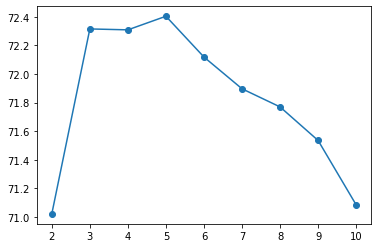

In [109]:
from sklearn import neighbors
# optimisation du score
score = []
score_max = 0
for k in range(2,11):
    knn = neighbors.KNeighborsClassifier(k)
    score.append(100*knn.fit(xtrain, ytrain).score(xtest, ytest))
    if score[k-2] > score_max:
        score_max = score[k-2]
        k_opt = k

print('Le meilleur score est : {:0.2f}% pour k={}.'.format(score_max,k_opt))
plt.plot(range(2,11), score, 'o-')
plt.show()

In [110]:
# récupération du classifieur le plus performant
knn = neighbors.KNeighborsClassifier(3)
knn.fit(xtrain, ytrain)

# récupération des prédictions sur les données test
predicted = knn.predict(xtest)
predicted

array(['Milk and yogurt', 'Cereals', 'Fish and seafood', ..., 'Sweets',
       'Salty and fatty products', 'Sweetened beverages'], dtype=object)

In [111]:
# on regroupe les données
ytest_df = pd.DataFrame(ytest).reset_index()
predicted_df = pd.DataFrame(predicted, columns=['predicted'])

comparaison = pd.concat([ytest_df, predicted_df], axis=1)

# ajout du nom des produits
nom_produits = openFoodFacts_fr_15.iloc[comparaison['index'].tolist(),:]['product_name'].reset_index()
comparaison = pd.concat([comparaison, nom_produits], axis=1)


# echantillonnage de 10 produits mal prédits
selection = comparaison[comparaison['pnns_groups_2'] != comparaison['predicted']].sample(10)
selection

,index,pnns_groups_2,predicted,index,product_name
4570,122319,Sweetened beverages,Milk and yogurt,122319,Yaourts à boire 3 parfums fraise vanille framb...
1472,37275,One-dish meals,Cereals,37275,Velouté de Pois Chiche Bio
102,12585,Salty and fatty products,Processed meat,12585,Mousse de Canard au Porto
4043,145492,Biscuits and cakes,Salty and fatty products,145492,Petits beurre aux pépites de chocolat
5827,63597,Pizza pies and quiches,Biscuits and cakes,63597,Tartelettes Pâte sablée riche en céréales Cho...
13365,75033,One-dish meals,Legumes,75033,Lentilles Cuisinées au Curry
14913,66154,Unsweetened beverages,Waters and flavored waters,66154,Floressance Aide Minceur The V.orthosiphon 60 ...
4673,148568,Sweets,Biscuits and cakes,148568,Chocolat au beurre de cacahuète
9785,170640,One-dish meals,Pizza pies and quiches,170640,Bouchées épinard & ricotta
8158,70942,Appetizers,Biscuits and cakes,70942,Biscuits à l'Huile d'Olive (Jus d'Orange et Ca...


Le score est relativement faible (~72%) au vu du nombre de données à renseigner (7% sur 171k de données), ce qui ne permet pas de l'utiliser pour remplacer les valeurs 'unknown' de la variable pnns_group_2

=> suppression des lignes ou pnns_group_2 == 'unknown'

In [112]:
print('suppression de ',
     len(openFoodFacts_fr_15[openFoodFacts_fr_15['pnns_groups_2'] == 'unknown']),
     'valeurs')
openFoodFacts_fr_15 = openFoodFacts_fr_15.drop(openFoodFacts_fr_15[openFoodFacts_fr_15['pnns_groups_2'] == 'unknown'].index)
openFoodFacts_fr_15.shape

suppression de  12087 valeurs


(159571, 21)

In [113]:
# proportion de données non renseignées sur l'intégralité du df
pourcent_NA_df(openFoodFacts_fr_15)

Il y a 94.40% valeurs renseignées (soit 5.60 % de valeurs manquantes) dans l'intégralité du df


## OUTLIERS (au sens IQR)
Il reste des outliers (valeurs < Q1 - 1.5 * IQR ou > Q3 + 1.5 * IQR) mais je décide de garder ces valeurs car cela peut correspondre à des valeurs pertinente (par exemple 100 g de carbohydrates_100g dans du sucre ou 100g de fat_100g dans une huile)

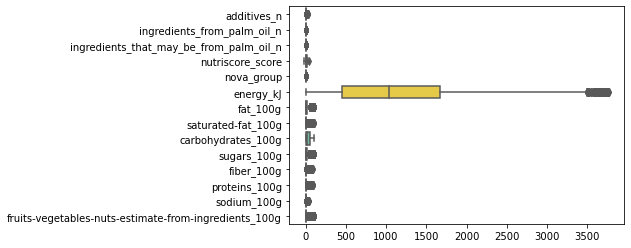

In [114]:
ax = sns.boxplot(data=openFoodFacts_fr_15, orient="h", palette="Set2")

In [115]:
openFoodFacts_fr_15.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,nova_group,energy_kJ,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g
count,159571.000000,159571.000000,159571.000000,159571.000000,147287.000000,159274.000000,159272.000000,159268.000000,159209.000000,159272.000000,85246.000000,159273.000000,159380.000000,159444.000000
mean,1.717818,0.047546,0.127153,8.943749,3.398840,1120.741339,14.069187,5.639522,26.480723,13.147955,2.640901,7.938420,0.359600,12.264522
std,2.367930,0.216136,0.423654,9.023653,0.954893,771.736609,17.136290,8.427022,26.847328,18.534109,3.708376,7.812213,0.670130,25.410163
min,0.000000,0.000000,0.000000,-15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,3.000000,448.000000,1.200000,0.300000,3.200000,0.900000,0.300000,1.800000,0.028000,0.000000
50%,1.000000,0.000000,0.000000,9.000000,4.000000,1032.000000,7.700000,2.100000,13.600000,3.800000,1.600000,6.000000,0.206324,0.000000
75%,3.000000,0.000000,0.000000,16.000000,4.000000,1667.000000,22.000000,8.000000,51.300000,18.500000,3.500000,11.000000,0.480000,10.000000
max,30.000000,2.000000,5.000000,40.000000,4.000000,3765.000000,100.000000,100.000000,100.000000,100.000000,89.000000,95.000000,40.000000,100.000000


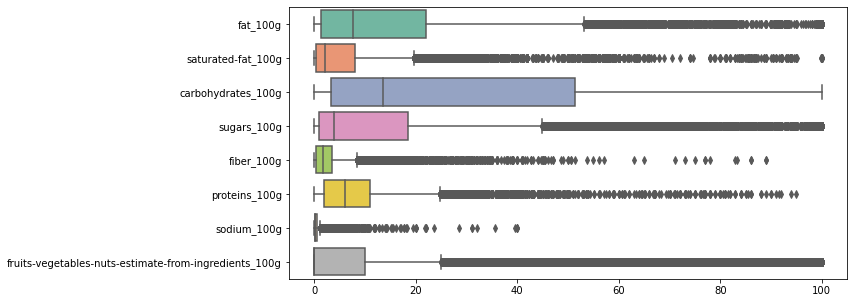

In [116]:
liste_100g = openFoodFacts_fr_15.columns[openFoodFacts_fr_15.columns.str.contains('_100g')]
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=openFoodFacts_fr_15[liste_100g], orient="h", palette="Set2")

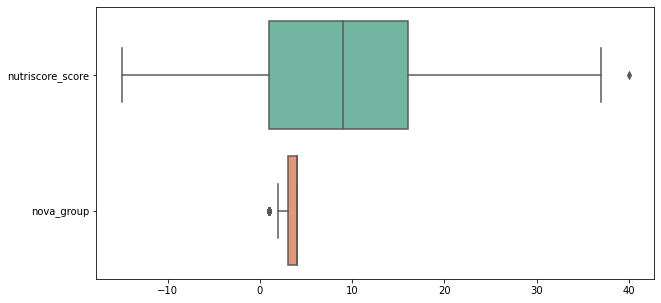

In [117]:
liste_score = ['nutriscore_score', 'nova_group']
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=openFoodFacts_fr_15[liste_score], orient="h", palette="Set2")

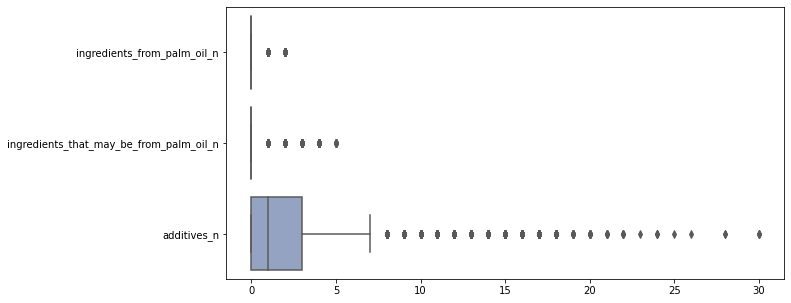

In [118]:
liste_palm_add = ['ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'additives_n']
plt.figure(figsize=(10,5))
ax = sns.boxplot(data=openFoodFacts_fr_15[liste_palm_add], orient="h", palette="Set2")

# Export du fichier final

In [119]:
openFoodFacts_fr_15.to_csv('../01_DATA/openFoodFacts_final.csv')